In [1]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
from scipy import spatial
from astropy.table import Table
from astropy.cosmology import LambdaCDM as Cos
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
from IPython import display 
from scipy import stats
from scipy.interpolate import interp1d
from scipy.stats import norm
import fitsio

import pickle
import dask

In [2]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers = 9)
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:37091 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 9 Cores: 72 Memory: 540.14 GB


In [3]:
table_of_centers = pd.read_csv("table_of_centers_dr9.csv")
table_of_centers_south = table_of_centers[0:437]
table_of_centers_north = table_of_centers[437:]
clusters = []

In [4]:
testing_centers_south = table_of_centers_south.sample(n = 10)
testing_centers_north = table_of_centers_north.sample(n = 10)

In [5]:
testing_centers_south_2 = table_of_centers_south.sample(n = 10)

In [6]:
print(testing_centers_south.patch.iloc[0])
print(testing_centers_south.patch.iloc[1])
print(testing_centers_south.patch.iloc[2])
print(testing_centers_south.patch.iloc[3])
print(testing_centers_south.patch.iloc[4])
print(testing_centers_south.patch.iloc[5])
print(testing_centers_south.patch.iloc[6])
print(testing_centers_south.patch.iloc[7])
print(testing_centers_south.patch.iloc[8])
print(testing_centers_south.patch.iloc[9])

/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-320m040-330m035.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-040p005-050p010.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-060m010-070m005.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-050m040-060m035.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-210p010-220p015.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-030m055-040m050.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-200p025-210p030.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-090m025-100m020.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-180p025-190p030.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-090m040-100m035.fits


In [7]:
print(testing_centers_north.patch.iloc[0])
print(testing_centers_north.patch.iloc[1])
print(testing_centers_north.patch.iloc[2])
print(testing_centers_north.patch.iloc[3])
print(testing_centers_north.patch.iloc[4])
print(testing_centers_north.patch.iloc[5])
print(testing_centers_north.patch.iloc[6])
print(testing_centers_north.patch.iloc[7])
print(testing_centers_north.patch.iloc[8])
print(testing_centers_north.patch.iloc[9])

/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-260p050-270p055.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-320p000-330p005.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-150p050-160p055.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-150p065-160p070.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-000p000-010p005.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-180p055-190p060.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-210p060-220p065.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-230p060-240p065.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-280p045-290p050.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-140p065-150p070.fits


In [8]:
print(testing_centers_south_2.patch.iloc[0])
print(testing_centers_south_2.patch.iloc[1])
print(testing_centers_south_2.patch.iloc[2])
print(testing_centers_south_2.patch.iloc[3])
print(testing_centers_south_2.patch.iloc[4])
print(testing_centers_south_2.patch.iloc[5])
print(testing_centers_south_2.patch.iloc[6])
print(testing_centers_south_2.patch.iloc[7])
print(testing_centers_south_2.patch.iloc[8])
print(testing_centers_south_2.patch.iloc[9])

/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-210p010-220p015.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-040m060-050m055.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-140p005-150p010.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-130p025-140p030.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-070m055-080m050.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-030m005-040p000.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-020p020-030p025.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-240p015-250p020.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-340m020-350m015.fits
/global/project/projectdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0/sweep-230p005-240p010.fits


In [9]:
#Mass fitting parameters and equations
a = 1.3620186928378857  
b = 9.968545069745126
j= 1.04935943 
k = 0.39573094 
l = 0.28347756
def mass_limit(z):
    return np.minimum((a*z + b), 11.2)

def mass_coefficient(z):
    return np.exp(j*z**2 + k*z + l)

#Radii
radius = 1
small_radius = 0.5
mini_radius = 0.1

#Buffer (in degrees, from interpolating maximum cluster radius at z = 0.05)
buffer = 0.285

In [10]:
@dask.delayed
def data_import(row2):
    fits_data = fitsio.FITS(row2.patch)
    sweep = fits_data[1].read(columns=['RELEASE','BRICKID','BRICKNAME', 'OBJID', 'TYPE', 'RA', 'DEC', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_W1', 'MASKBITS', 'GAIA_PHOT_G_MEAN_MAG', 'GAIA_ASTROMETRIC_EXCESS_NOISE'])
    with fits.open(row2.photoz) as data:
        pz = pd.DataFrame(data[1].data)
    mass = np.load(row2.masses)
    
    pz['mass'] = mass
    pz['RELEASE']=sweep['RELEASE']
    pz['BRICKID']=sweep['BRICKID']
    pz['BRICKNAME']=sweep['BRICKNAME']
    pz['OBJID']=sweep['OBJID']
    pz['TYPE']=sweep['TYPE']
    pz['RA']=sweep['RA']
    pz['DEC']=sweep['DEC']
    pz['FLUX_G']=sweep['FLUX_G']
    pz['FLUX_R']=sweep['FLUX_R']
    pz['FLUX_Z']=sweep['FLUX_Z']
    pz['FLUX_W1']=sweep['FLUX_W1']
    pz['MASKBITS']=sweep['MASKBITS']
    pz['gaia_phot_g_mean_mag']=sweep['GAIA_PHOT_G_MEAN_MAG']
    pz['gaia_astrometric_excess_noise']=sweep['GAIA_ASTROMETRIC_EXCESS_NOISE']
    return pz

In [46]:
pbar = display.ProgressBar(len(testing_centers_south_2))
pbar.display()

list_of_imports = []

#Remember to change testing_centers to table_of_centers
for index, row in testing_centers_south_2.iterrows():
    delayed_import = data_import(row)
    list_of_imports.append(delayed_import)
    pbar.progress = index + 1
    
imports = dask.compute(*list_of_imports)
ra_dec = pd.concat(imports)

[==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] 191/10

In [47]:
zmag=np.array(22.5-2.5*np.log10(ra_dec.FLUX_Z))
zmag[np.where(~np.isfinite(zmag))]=99.
#whgood=np.where(np.logical_and(zmag < 21,ra_dec.mass > 0 ))
isgood=np.logical_and(zmag < 21,ra_dec.mass > 0)
ra_dec = ra_dec[isgood]

#Further sample cuts
ra_dec["z_phot_median"] = ra_dec.Z_PHOT_MEDIAN
ra_dec["z_phot_std"] = ra_dec.Z_PHOT_STD
ra_dec.drop(columns = ["Z_PHOT_MEDIAN", "Z_PHOT_STD"])
ra_dec = ra_dec[np.logical_or(ra_dec.MASKBITS == 0, ra_dec.MASKBITS == 4096)]
ra_dec = ra_dec[np.logical_or(np.logical_or(ra_dec.gaia_phot_g_mean_mag > 19, ra_dec.gaia_astrometric_excess_noise > 10**.5), ra_dec.gaia_astrometric_excess_noise==0)]
ra_dec["magR"] = 22.5-2.5*np.log10(ra_dec.FLUX_R)
ra_dec["magZ"] = 22.5-2.5*np.log10(ra_dec.FLUX_Z)
ra_dec["magW1"] = 22.5-2.5*np.log10(ra_dec.FLUX_W1)
l_mask = (ra_dec.magR - ra_dec.magW1) > 1.8*(ra_dec.magR-ra_dec.magZ)-0.6
l_mask[~np.isfinite(l_mask)] = False
ra_dec = ra_dec[np.logical_and(22.5 - 2.5*np.log10(ra_dec.FLUX_Z)<21, ra_dec.z_phot_median>0.01)]
a_dec = ra_dec[ra_dec.TYPE != "PSF"]

#Coordinates
ra_dec["RA_r"] = (np.pi/180)*ra_dec["RA"]
ra_dec["DEC_r"] = (np.pi/180)*ra_dec["DEC"]
ra_dec["gid"] = np.round(ra_dec.RA, 6)*10**16 + np.round(ra_dec.DEC + 90, 6)*10**6

#Oversampling
ra_dec.reset_index(inplace = True, drop = True)
oversample = 30
over = np.array([ra_dec.z_phot_median.values]).T*np.ones((len(ra_dec), oversample))
sigma = np.array([ra_dec.z_phot_std.values]).T*np.ones((len(ra_dec), oversample))
random = np.random.normal(loc = 0, scale = 1, size = (len(ra_dec), oversample))
gauss = over + sigma*random
ra_dec["gauss_z"] = pd.Series(list(gauss))

#Coordinate transform to prevent zeros
ra_dec["y"] = ra_dec["DEC_r"] - np.mean(ra_dec["DEC_r"]) + 50
ra_dec["x"] = (ra_dec["RA_r"] - np.mean(ra_dec["RA_r"]))*np.cos(ra_dec["DEC_r"]) + 50

In [48]:
len(ra_dec)

2897665

In [14]:
ra_dec.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2897665 entries, 0 to 2897664
Data columns (total 36 columns):
RELEASE                          int16
BRICKID                          int32
OBJID                            int32
Z_PHOT_MEAN                      float32
Z_PHOT_MEDIAN                    float32
Z_PHOT_STD                       float32
Z_PHOT_L68                       float32
Z_PHOT_U68                       float32
Z_PHOT_L95                       float32
Z_PHOT_U95                       float32
Z_SPEC                           float32
SURVEY                           object
TRAINING                         bool
mass                             float32
BRICKNAME                        |S8
TYPE                             |S3
RA                               float64
DEC                              float64
FLUX_G                           float32
FLUX_R                           float32
FLUX_Z                           float32
FLUX_W1                          float32
MAS

In [32]:
with open("Data/sweep-000m005-010p000_trim.pkl", "rb") as f:
    ra_dec = pickle.load(f)
cos = Cos(H0 = 70, Om0 = .286, Ode0 = .714)
z_array = np.linspace(1e-2, ra_dec.z_phot_median.max(), 500)
sparse_radius = (1+z_array)/(cos.comoving_distance(z_array))
radius_threshold = interp1d(z_array, sparse_radius, kind = "linear", fill_value = "extrapolate")

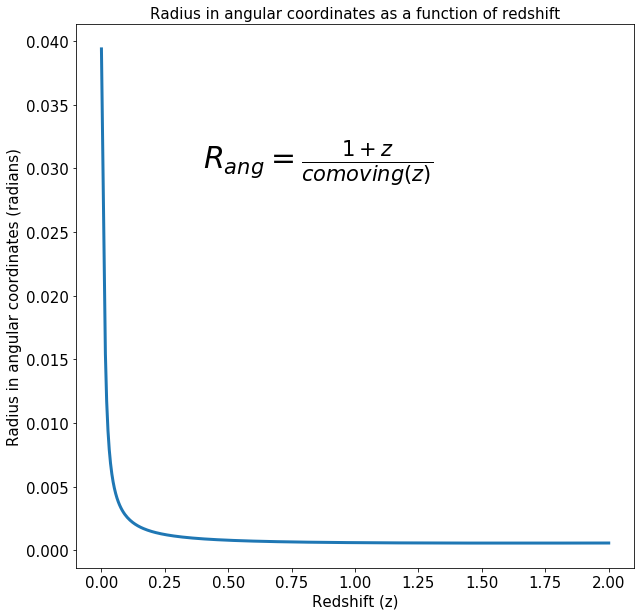

In [45]:
plt.figure(figsize = (10, 10))
plt.plot(np.linspace(0, 2, 10000), radius_threshold(np.linspace(0, 2, 10000)), "-", lw = 3)
plt.title("Radius in angular coordinates as a function of redshift", fontsize = 15)
plt.ylabel("Radius in angular coordinates (radians)", fontsize = 15)
plt.xlabel("Redshift (z)", fontsize = 15)
string = r"$R_{ang} = \frac{1+z}{comoving(z)}$"
plt.text(0.4, 0.03, s = string, fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [14]:
radius_df = pd.DataFrame(np.array([z_array, sparse_radius]).T, columns = ["z", "radius"])
radius = Table.from_pandas(radius_df)
radius.write('radius_training_north.fits', format = 'fits')

In [2]:
hdul = fits.open("radius_training_north.fits")  # open a FITS file
data = hdul[1].data

FileNotFoundError: [Errno 2] No such file or directory: 'radius_training_north.fits'

In [37]:
hdul = fits.open("radius_training.fits")  # open a FITS file
data2 = hdul[1].data

FileNotFoundError: [Errno 2] No such file or directory: 'radius_training.fits'

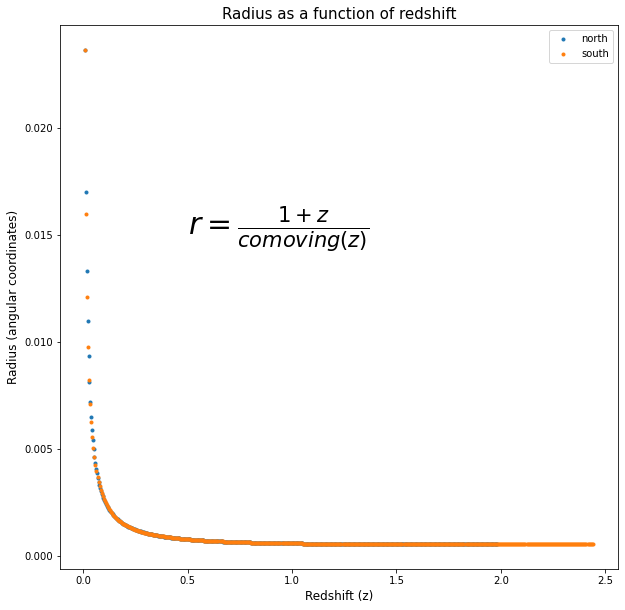

In [53]:
plt.figure(figsize = (10, 10))
plt.plot(data.z, data.radius, ".", label = "north")
#plt.plot(data2.z, data2.radius, ".", label = "south")
plt.title("Radius as a function of redshift", fontsize = 15)
plt.ylabel("Radius (angular coordinates)", fontsize = 12)
plt.xlabel("Redshift (z)", fontsize = 12)
string = r"$r = \frac{1+z}{comoving(z)}$"
plt.text(0.5, 0.015, s = string, fontsize = 30)
plt.legend()
plt.show()

In [49]:
median = stats.binned_statistic(ra_dec.z_phot_median, ra_dec.z_phot_std, "median", bins = np.linspace(0.05, ra_dec.z_phot_median.max(), 100))
bins = np.linspace(0.05, ra_dec.z_phot_median.max(), 99)
z_threshold = interp1d(bins, np.minimum(median[0], np.ones(len(median[0]))*0.1), kind = "linear", fill_value = "extrapolate")

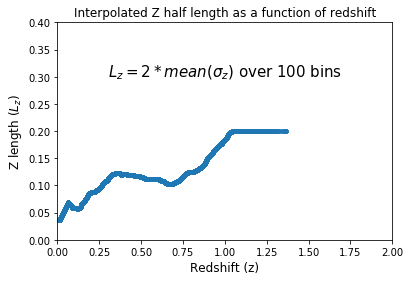

In [50]:
plt.plot(ra_dec.z_phot_median, 2*z_threshold(ra_dec.z_phot_median), ".")
plt.xlim(0, 2)
plt.ylim(0, 0.4)
plt.title("Interpolated Z half length as a function of redshift",  fontsize = 12)
plt.ylabel("Z length ($L_z$)",  fontsize = 12)
plt.xlabel("Redshift (z)",  fontsize = 12)
string = r"$L_z = 2* mean(\sigma_z)$ over 100 bins"
plt.text(0.3, 0.3, s = string, fontsize = 15)
plt.show()

In [18]:
threshold_df = pd.DataFrame(np.array([bins, np.minimum(median[0], np.ones(len(median[0]))*0.1)]).T, columns = ["z", "sigma_z_threshold"])
threshold = Table.from_pandas(threshold_df)
threshold.write('threshold_training_south_2.fits', format = 'fits')

In [24]:
threshold_df = pd.DataFrame(np.array([bins, np.minimum(median[0], np.ones(len(median[0]))*0.1)]).T, columns = ["z", "sigma_z_threshold"])
threshold = Table.from_pandas(threshold_df)
threshold.write('threshold_training_north_2.fits', format = 'fits')

In [25]:
hdul = fits.open("threshold_training_north.fits")  # open a FITS file
data = hdul[1].data

In [26]:
hdul = fits.open("threshold_training_south.fits")  # open a FITS file
data2 = hdul[1].data

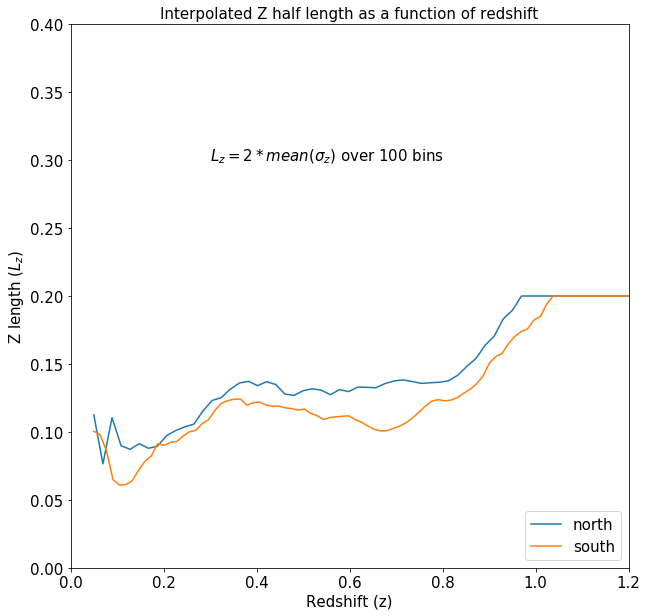

In [27]:
plt.figure(figsize = (10, 10))
plt.plot(data.z, 2*data.sigma_z_threshold, "-", label = "north")
plt.plot(data2.z, 2*data2.sigma_z_threshold, "-", label = "south")
plt.xlim(0, 1.2)
plt.ylim(0, 0.4)
plt.title("Interpolated Z half length as a function of redshift",  fontsize = 15)
plt.ylabel("Z length ($L_z$)",  fontsize = 15)
plt.xlabel("Redshift (z)",  fontsize = 15)
string = r"$L_z = 2* mean(\sigma_z)$ over 100 bins"
plt.text(0.3, 0.3, s = string, fontsize = 15)
plt.legend(loc = "lower right",  fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [28]:
hdul = fits.open("threshold_training_north_2.fits")  # open a FITS file
data = hdul[1].data

In [29]:
hdul = fits.open("threshold_training_south_2.fits")  # open a FITS file
data2 = hdul[1].data

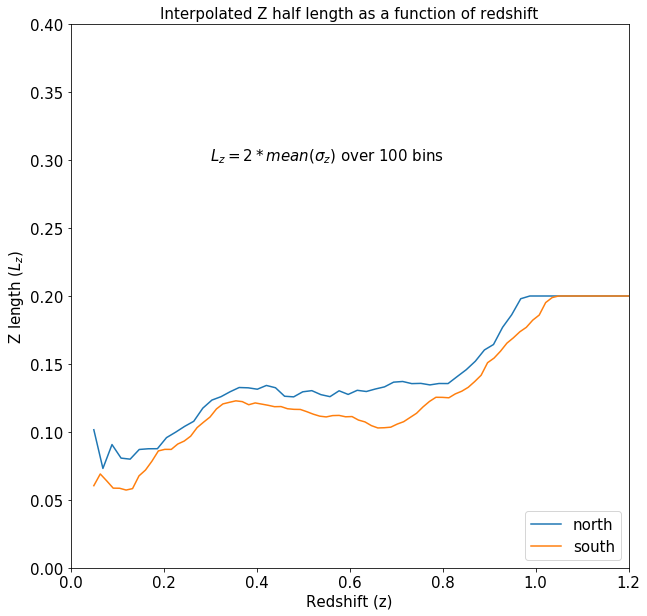

In [30]:
plt.figure(figsize = (10, 10))
plt.plot(data.z, 2*data.sigma_z_threshold, "-", label = "north")
plt.plot(data2.z, 2*data2.sigma_z_threshold, "-", label = "south")
plt.xlim(0, 1.2)
plt.ylim(0, 0.4)
plt.title("Interpolated Z half length as a function of redshift",  fontsize = 15)
plt.ylabel("Z length ($L_z$)",  fontsize = 15)
plt.xlabel("Redshift (z)",  fontsize = 15)
string = r"$L_z = 2* mean(\sigma_z)$ over 100 bins"
plt.text(0.3, 0.3, s = string, fontsize = 15)
plt.legend(loc = "lower right",  fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [51]:
massive_sample = ra_dec[ra_dec.mass > 11.2].copy()
massive_sample["neighbors"] = np.zeros(len(massive_sample))
massive_sample["local_neighbors"] = np.zeros(len(massive_sample))
massive_sample.reset_index(inplace=True, drop = True)

In [52]:
len(massive_sample)

265682

In [53]:
tree = spatial.cKDTree(ra_dec[["x", "y"]], copy_data = True)

In [54]:
radius = 1
small_radius = 0.5
mini_radius = 0.1

indexable = ra_dec[["z_phot_median", "x", "y", "mass", "gauss_z", "gid", "z_phot_std"]].values.copy()
iterrator = massive_sample.copy()

In [55]:
len(iterrator)

265682

In [56]:
cos = Cos(H0 = 70, Om0 = .286, Ode0 = .714)
z_array = np.linspace(1e-2, 2, 500)
sparse_radius = (1+z_array)/(cos.comoving_distance(z_array))
radius_threshold = interp1d(z_array, sparse_radius, kind = "linear", fill_value = "extrapolate")

In [58]:
pbar = display.ProgressBar(len(massive_sample)-1)
pbar.display()
for i, row in iterrator.iterrows():
    neighbors = tree.query_ball_point([row.x, row.y], radius_threshold(row.z_phot_median))
    if len(neighbors) > 0:
        local_data = indexable[neighbors]
        
        z_c = z_threshold(row.z_phot_median)
        cylinder = np.abs(np.vstack(local_data[:, 4]) - row.z_phot_median)
        weight_array = cylinder < 2*z_c
        weights = weight_array.sum(axis = 1)/oversample
        
        approx_cluster = np.append(local_data, np.reshape(weights, newshape = (len(weights), 1)), axis = 1)
        cluster = approx_cluster[approx_cluster[:, -1] > 0]
        
        r_smaller = radius_threshold(row.z_phot_median)
        small_cluster = cluster[np.sqrt(np.array((cluster[:, 1] - row.x)**2 + (cluster[:, 2] - row.y)**2).astype(float)) < small_radius*r_smaller]
        mini_cluster = cluster[np.sqrt(np.array((cluster[:, 1] - row.x)**2 + (cluster[:, 2] - row.y)**2).astype(float)) < mini_radius*r_smaller]
        
        massive_sample.at[i, "neighbors"] = np.sum(cluster[:, -1])
        massive_sample.at[i, "local_neighbors"] = np.sum(small_cluster[:, -1])
        
    
    pbar.progress = i

[=========================================================== ] 262393/265681

/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To cha

In [59]:
bins = np.arange(0.05, massive_sample.z_phot_median.max(), 0.01)
binned = [massive_sample[np.logical_and(massive_sample.z_phot_median>=i-.025, massive_sample.z_phot_median<=i+.025)].copy() for i in bins]
clusters = pd.DataFrame()
threshold1 = np.empty(len(binned))
threshold2 = np.empty(len(binned))
for i in range(len(binned)):
    threshold1[i] = np.mean(binned[i].neighbors) + 1.8*np.sqrt(np.mean(binned[i].neighbors))
    threshold2[i] = np.mean(binned[i].local_neighbors) + 1.2*np.sqrt(np.mean(binned[i].local_neighbors))

In [60]:
thresh1 = interp1d(bins, threshold1, kind = "linear", fill_value = "extrapolate")
thresh2 = interp1d(bins, threshold2, kind = "linear", fill_value = "extrapolate")

In [61]:
massive_sample.sort_values("neighbors", ascending = False).head()

,RELEASE,BRICKID,OBJID,Z_PHOT_MEAN,Z_PHOT_MEDIAN,Z_PHOT_STD,Z_PHOT_L68,Z_PHOT_U68,Z_PHOT_L95,Z_PHOT_U95,...,magZ,magW1,RA_r,DEC_r,gid,gauss_z,y,x,neighbors,local_neighbors
206350,9010,432030,4634,0.025980,0.026240,0.004539,0.021555,0.029600,0.018296,0.035948,...,12.943241,12.981196,4.211180,0.309929,2.412829e+18,"[0.023990318110635664, 0.036478831483276325, 0...",50.265974,51.711434,426.733333,162.066667
202773,9010,422373,5814,0.028635,0.028489,0.003650,0.024887,0.032058,0.022696,0.035659,...,13.496218,13.835429,4.206097,0.279262,2.409916e+18,"[0.025115256916041075, 0.03257643057462485, 0....",50.235307,51.722548,405.200000,90.866667
206352,9010,432030,4731,0.029964,0.029521,0.003593,0.026575,0.032564,0.024320,0.038732,...,12.522736,12.943063,4.211261,0.309445,2.412875e+18,"[0.02894330299928147, 0.025482434188629378, 0....",50.265489,51.711775,392.633333,148.000000
202908,9010,423758,2876,0.031916,0.031630,0.003855,0.028058,0.035478,0.025071,0.040509,...,13.696202,14.061151,4.206043,0.285569,2.409885e+18,"[0.027809378061774113, 0.02824167153200054, 0....",50.241614,51.719346,388.966667,93.733333
203620,9010,422372,1875,0.031545,0.030985,0.006253,0.025885,0.036882,0.018159,0.046945,...,12.168302,12.684739,4.198755,0.278810,2.405709e+18,"[0.03386014765335062, 0.02343560431431793, 0.0...",50.234854,51.715713,369.700000,133.233333


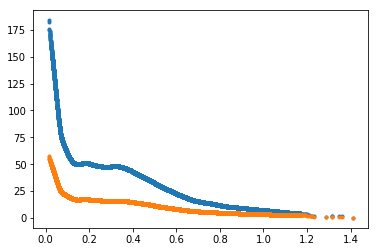

In [62]:
graph1 = thresh1(massive_sample.z_phot_median)
graph2 = thresh2(massive_sample.z_phot_median)
plt.plot(massive_sample.z_phot_median, graph1, ".")
plt.plot(massive_sample.z_phot_median, graph2, ".")
plt.show()

In [64]:
threshold_df = pd.DataFrame(np.array([bins, threshold1, threshold2]).T, columns = ["z", "neighbor_threshold1", "neighbor_threshold2"])
threshold = Table.from_pandas(threshold_df)
threshold.write('neighbor_training_south_2_2.fits', format = 'fits')

In [45]:
threshold_df = pd.DataFrame(np.array([bins, threshold1, threshold2]).T, columns = ["z", "neighbor_threshold1", "neighbor_threshold2"])
threshold = Table.from_pandas(threshold_df)
threshold.write('neighbor_training_north_2.fits', format = 'fits')

In [47]:
hdul = fits.open("neighbor_training_north.fits")  # open a FITS file
data = hdul[1].data

In [48]:
hdul = fits.open("neighbor_training_south.fits")  # open a FITS file
data2 = hdul[1].data

In [112]:
hdul = fits.open("neighbor_training_south_2.fits")  # open a FITS file
data3 = hdul[1].data

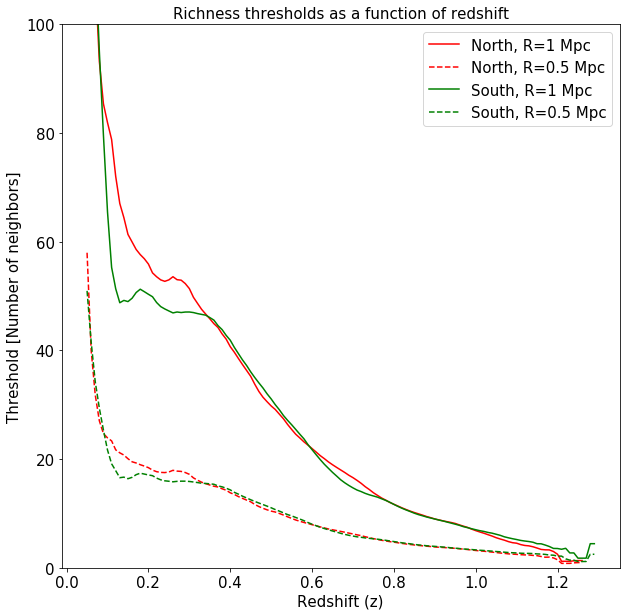

In [53]:
plt.figure(figsize = (10, 10))
plt.plot(data.z, data.neighbor_threshold1, "-r", label = "North, R=1 Mpc")
plt.plot(data.z, data.neighbor_threshold2, "--r", label = "North, R=0.5 Mpc")
plt.plot(data2.z, data2.neighbor_threshold1, "-g", label = "South, R=1 Mpc")
plt.plot(data2.z, data2.neighbor_threshold2, "--g", label = "South, R=0.5 Mpc")
#plt.plot(data3.z, data3.neighbor_threshold1, ".b", label = "south2")
#plt.plot(data3.z, data3.neighbor_threshold2, ".b", label = "south2")
plt.ylim(0, 100)
#plt.xlim(0, 2.5)
plt.xlabel("Redshift (z)",  fontsize = 15)
plt.ylabel("Threshold [Number of neighbors]",  fontsize = 15)
plt.title("Richness thresholds as a function of redshift", fontsize = 15)
plt.legend(fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [65]:
hdul = fits.open("neighbor_training_north_2.fits")  # open a FITS file
data = hdul[1].data

In [66]:
hdul = fits.open("neighbor_training_south_2_2.fits")  # open a FITS file
data2 = hdul[1].data

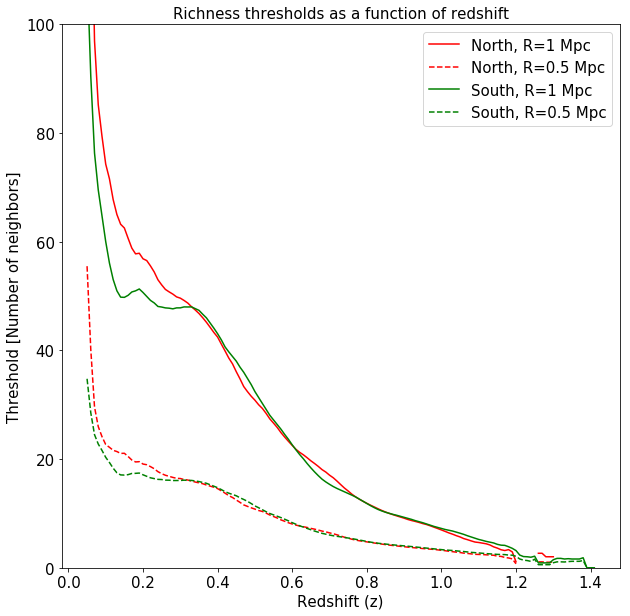

In [67]:
plt.figure(figsize = (10, 10))
plt.plot(data.z, data.neighbor_threshold1, "-r", label = "North, R=1 Mpc")
plt.plot(data.z, data.neighbor_threshold2, "--r", label = "North, R=0.5 Mpc")
plt.plot(data2.z, data2.neighbor_threshold1, "-g", label = "South, R=1 Mpc")
plt.plot(data2.z, data2.neighbor_threshold2, "--g", label = "South, R=0.5 Mpc")
#plt.plot(data3.z, data3.neighbor_threshold1, ".b", label = "south2")
#plt.plot(data3.z, data3.neighbor_threshold2, ".b", label = "south2")
plt.ylim(0, 100)
#plt.xlim(0, 2.5)
plt.xlabel("Redshift (z)",  fontsize = 15)
plt.ylabel("Threshold [Number of neighbors]",  fontsize = 15)
plt.title("Richness thresholds as a function of redshift", fontsize = 15)
plt.legend(fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()